# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
df = pd.read_csv("./data/cleaned_aviation_data.csv")

# df.shape
# df.columns

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
small_df = df[df["Total.Aboard"] < 20].copy()
large_df = df[df["Total.Aboard"] >= 20].copy()

# print("Small aircraft:", small_df.shape)
# print("Large aircraft:", large_df.shape)

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [4]:
small_make_stats = (
    small_df
  .groupby("Make")
  .agg(
    mean_injury_fraction=("serious_fatal_fraction", "mean"),
    count=("serious_fatal_fraction", "count"),
    destroyed_rate=("destroyed", "mean")
  )
)

small_make_stats = small_make_stats[small_make_stats["count"] >= 20]

small_lowest_15 = small_make_stats.sort_values("mean_injury_fraction").head(15)

small_lowest_15

,mean_injury_fraction,count,destroyed_rate
Make,,,
MCDONNELL DOUGLAS,0.094048,30,0.072727
BOEING,0.141973,272,0.036415
AVIAT AIRCRAFT INC,0.164474,76,0.039474
MAULE,0.164806,215,0.041860
GRUMMAN ACFT ENG COR-SCHWEIZER,0.206897,58,0.017241
AYRES,0.215686,51,0.134615
STINSON,0.216408,129,0.023256
AVIAT,0.221429,70,0.100000
BELLANCA,0.222603,219,0.050228


In [5]:
large_make_stats = (
  large_df
  .groupby("Make")
  .agg(
    mean_injury_fraction=("serious_fatal_fraction", "mean"),
    count=("serious_fatal_fraction", "count"),
    destroyed_rate=("destroyed", "mean")
  )
)

large_make_stats = large_make_stats[large_make_stats["count"] >= 20]

large_lowest_15 = large_make_stats.sort_values("mean_injury_fraction").head(15)

large_lowest_15

,mean_injury_fraction,count,destroyed_rate
Make,,,
MCDONNELL DOUGLAS,0.007827,53,0.075472
BOMBARDIER INC,0.028038,44,0.022727
BOEING,0.056771,547,0.049360
BOMBARDIER,0.063701,21,0.047619
EMBRAER,0.065274,78,0.051282
AIRBUS,0.086249,118,0.076271


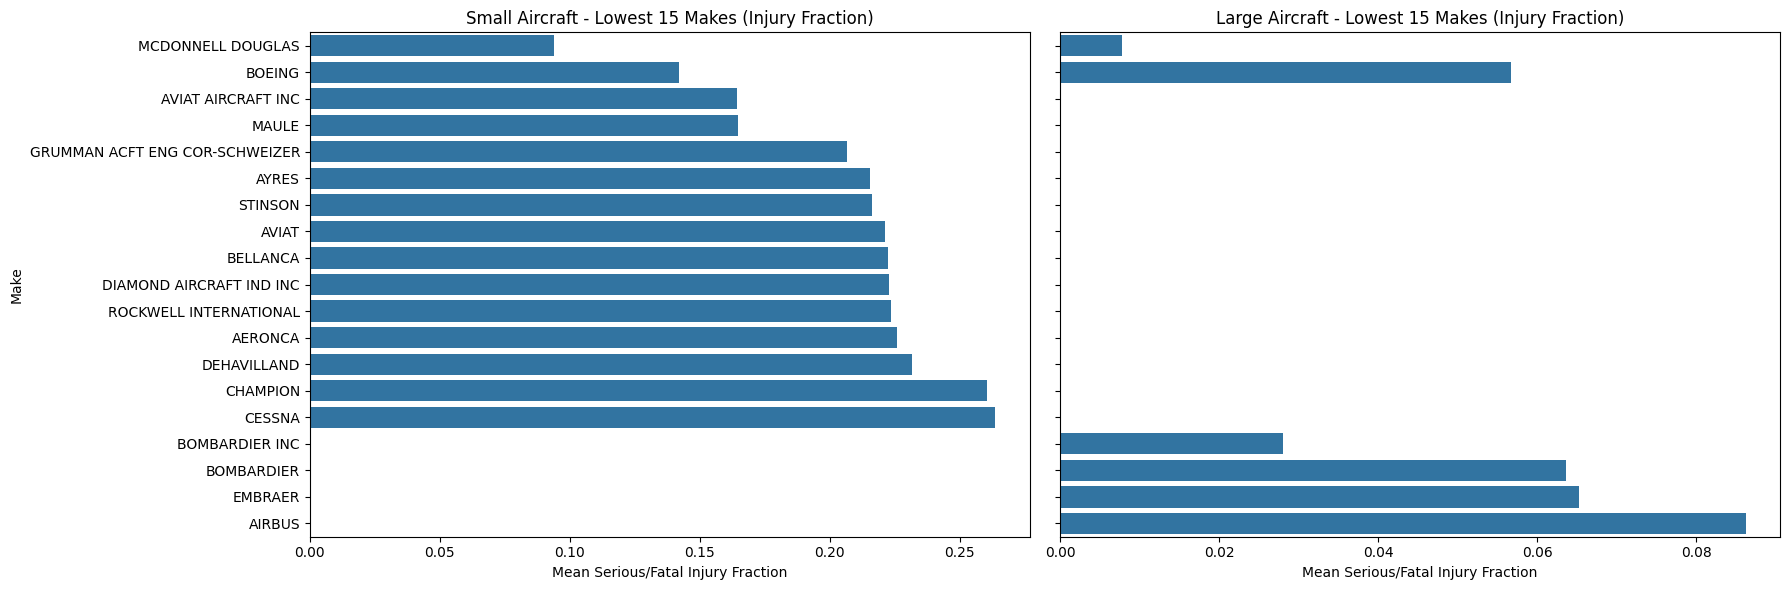

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.barplot(
    data=small_lowest_15.reset_index(),
    x="mean_injury_fraction",
    y="Make",
    ax=axes[0]
)
axes[0].set_title("Small Aircraft - Lowest 15 Makes (Injury Fraction)")
axes[0].set_xlabel("Mean Serious/Fatal Injury Fraction")

sns.barplot(
    data=large_lowest_15.reset_index(),
    x="mean_injury_fraction",
    y="Make",
    ax=axes[1]
)
axes[1].set_title("Large Aircraft - Lowest 15 Makes (Injury Fraction)")
axes[1].set_xlabel("Mean Serious/Fatal Injury Fraction")

plt.tight_layout()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

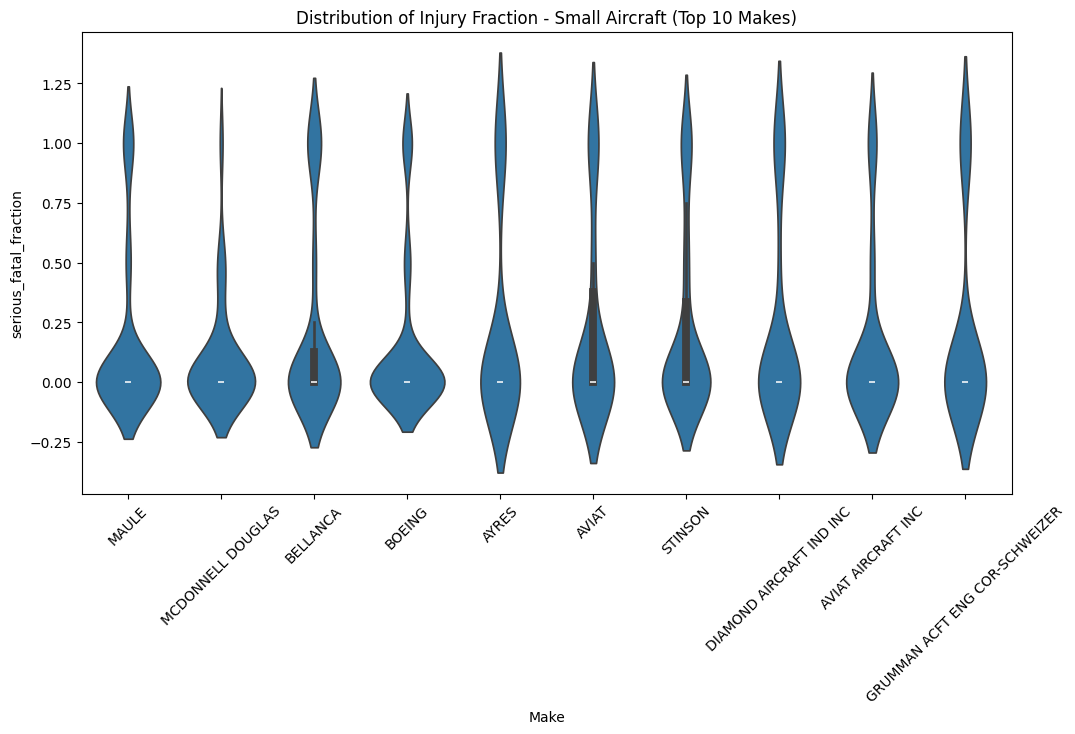

In [7]:
small_top10 = small_lowest_15.head(10).index

plt.figure(figsize=(12, 6))
sns.violinplot(
  data=small_df[small_df["Make"].isin(small_top10)],
  x="Make",
  y="serious_fatal_fraction"
)

plt.xticks(rotation=45)
plt.title("Distribution of Injury Fraction - Small Aircraft (Top 10 Makes)")
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

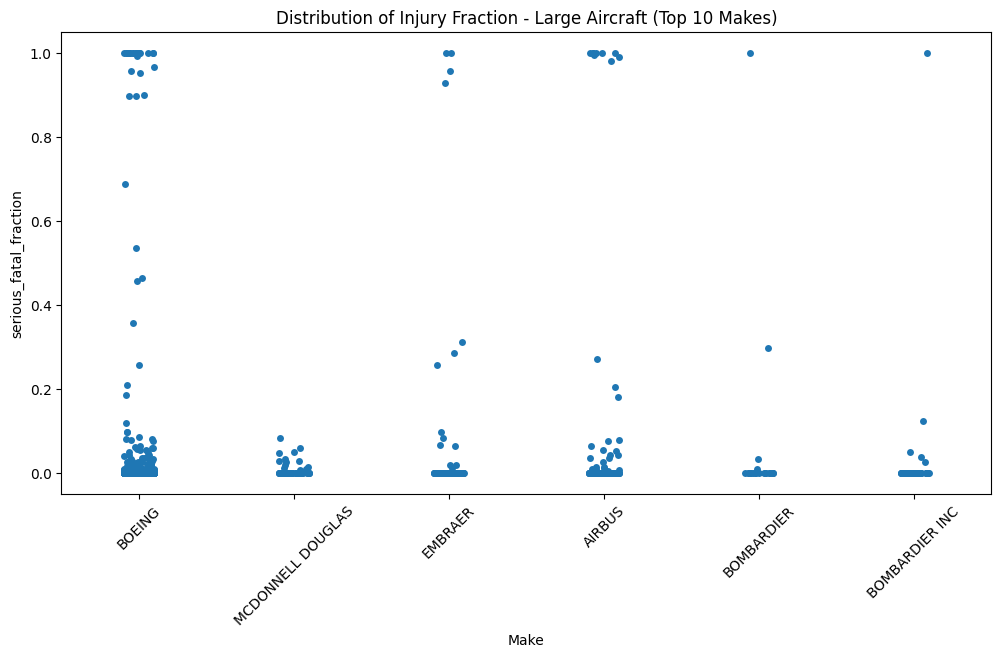

In [8]:
large_top10 = large_lowest_15.head(10).index

plt.figure(figsize=(12, 6))
sns.stripplot(
  data=large_df[large_df["Make"].isin(large_top10)],
  x="Make",
  y="serious_fatal_fraction",
  jitter=True
)

plt.xticks(rotation=45)
plt.title("Distribution of Injury Fraction - Large Aircraft (Top 10 Makes)")
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [9]:
small_lowest_destroyed = small_make_stats.sort_values("destroyed_rate").head(15)
large_lowest_destroyed = large_make_stats.sort_values("destroyed_rate").head(15)

small_lowest_destroyed
large_lowest_destroyed

,mean_injury_fraction,count,destroyed_rate
Make,,,
BOMBARDIER INC,0.028038,44,0.022727
BOMBARDIER,0.063701,21,0.047619
BOEING,0.056771,547,0.049360
EMBRAER,0.065274,78,0.051282
MCDONNELL DOUGLAS,0.007827,53,0.075472
AIRBUS,0.086249,118,0.076271


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Discussion of Make-Level Safety Metrics

The analysis evaluated aircraft manufacturers separately for small and large aircraft using two key safety indicators:

1. Mean serious/fatal injury fraction  
2. Aircraft destruction rate  

For large aircraft manufacturers, several makes demonstrated consistently low injury fractions and relatively low destruction rates. In particular, Boeing and Bombardier Inc. exhibit comparatively low mean serious/fatal injury fractions while also maintaining low destruction rates across a substantial number of observations (e.g., Boeing with over 500 recorded accidents). The large sample size for Boeing increases confidence in the stability of its estimated safety metrics.

McDonnell Douglas shows an extremely low mean injury fraction; however, its destruction rate is moderately higher, and its total number of observations is smaller compared to Boeing. Therefore, while the injury fraction appears favorable, interpretation should consider sample size.

Airbus demonstrates slightly higher mean injury fractions relative to Boeing and Bombardier but still maintains relatively low destruction rates. Given Airbus’ large commercial presence, its safety profile remains competitive though marginally higher in injury fraction compared to Boeing.

From the distributional plots:
- Injury fractions for leading large manufacturers appear tightly concentrated near zero, with occasional higher-severity outliers.
- The limited dispersion suggests that severe passenger injury events are relatively rare among major commercial manufacturers.

For small aircraft manufacturers (from earlier plots), injury fractions tend to exhibit greater dispersion, reflecting more variability in accident outcomes within general aviation. However, the lowest-performing makes demonstrate consistently lower injury fractions and lower destruction rates, suggesting comparatively better structural survivability and/or operational conditions.

### Recommendations

Based on both mean serious/fatal injury fraction and destruction rate:

- Boeing appears to be the strongest candidate among large aircraft manufacturers due to its combination of low injury fraction, low destruction rate, and very large sample size.
- Bombardier Inc. also demonstrates strong safety characteristics, though with fewer observations.
- Airbus remains competitive but shows slightly higher injury fractions relative to Boeing.

For small aircraft, recommendations should focus on makes that demonstrate both low mean injury fraction and low destruction rates while meeting minimum sample thresholds to ensure statistical robustness.

Overall, the data suggest that major commercial manufacturers exhibit consistently low rates of serious/fatal injury and aircraft destruction relative to smaller general aviation makes, though variability is greater among smaller aircraft categories.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

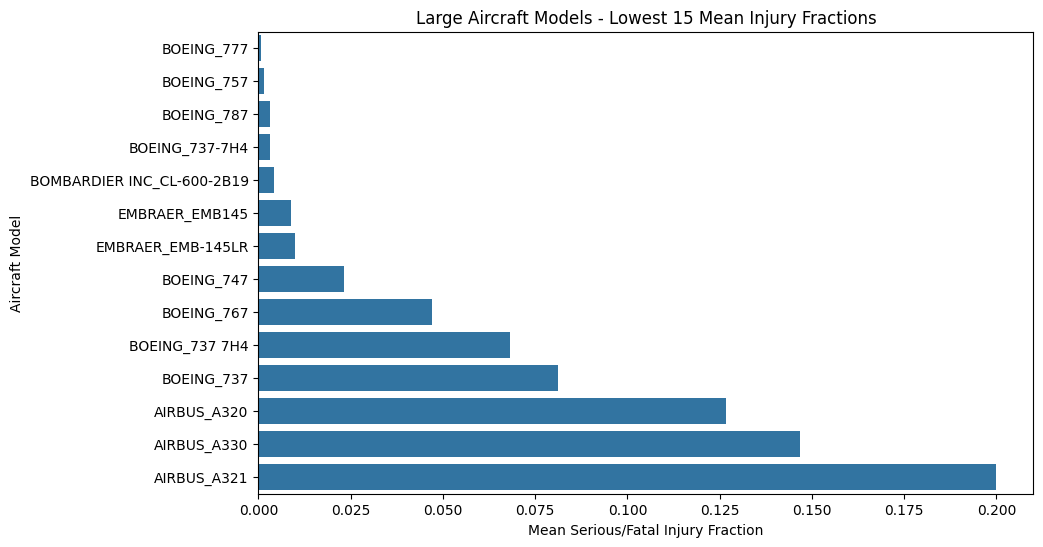

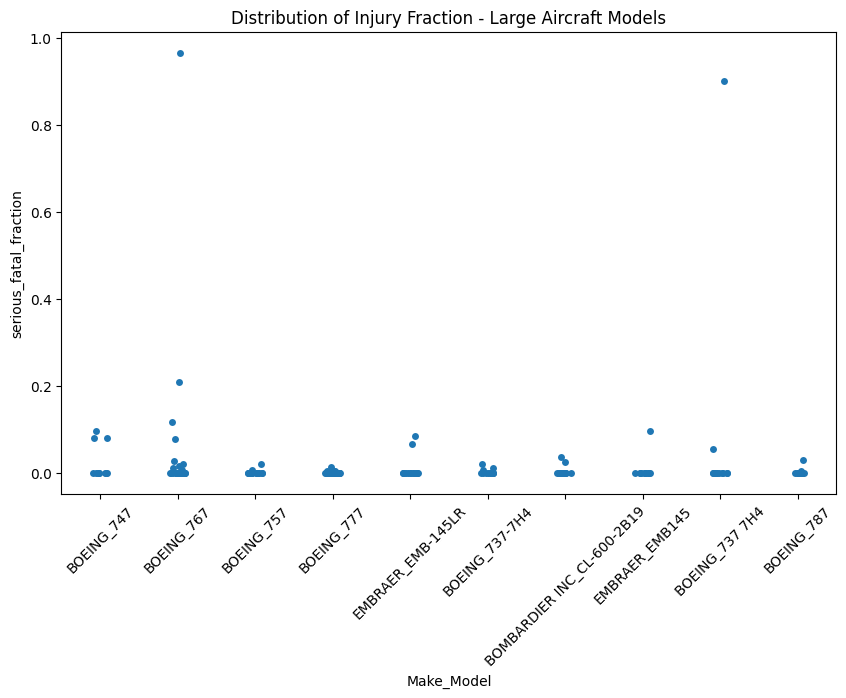

In [10]:
large_model_stats = (
  large_df
  .groupby("Make_Model")
  .agg(
    mean_injury_fraction=("serious_fatal_fraction", "mean"),
    count=("serious_fatal_fraction", "count")
  )
)

large_model_stats = large_model_stats[large_model_stats["count"] >= 10]

# lowest 15 models
large_lowest_models = large_model_stats.sort_values("mean_injury_fraction").head(15)

# mean
plt.figure(figsize=(10,6))
sns.barplot(
    data=large_lowest_models.reset_index(),
    x="mean_injury_fraction",
    y="Make_Model"
)
plt.title("Large Aircraft Models - Lowest 15 Mean Injury Fractions")
plt.xlabel("Mean Serious/Fatal Injury Fraction")
plt.ylabel("Aircraft Model")
plt.show()

# distribution
large_top10_models = large_lowest_models.head(10).index

plt.figure(figsize=(10,6))
sns.stripplot(
    data=large_df[large_df["Make_Model"].isin(large_top10_models)],
    x="Make_Model",
    y="serious_fatal_fraction",
    jitter=True
)
plt.xticks(rotation=45)
plt.title("Distribution of Injury Fraction - Large Aircraft Models")
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

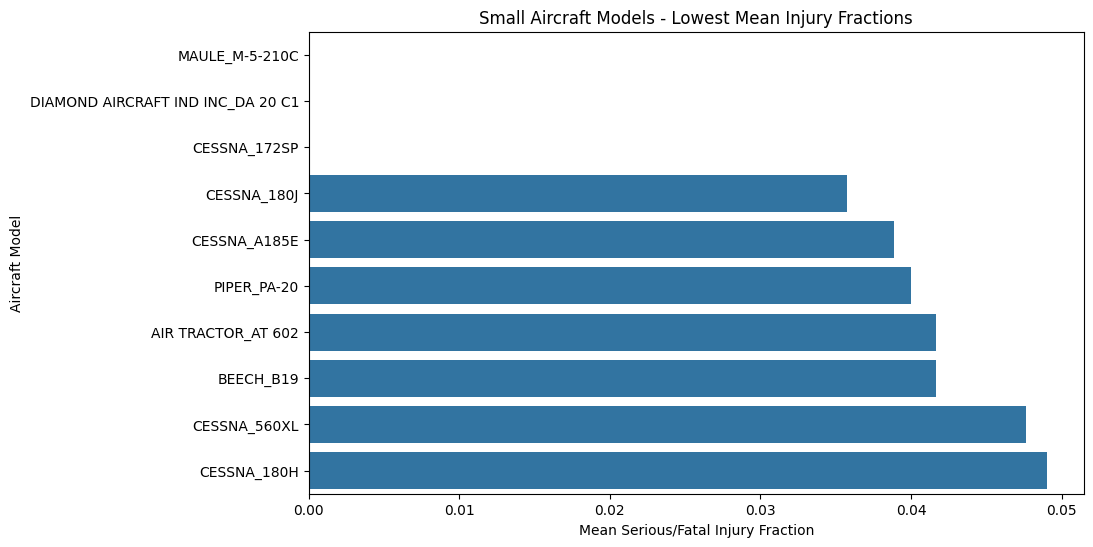

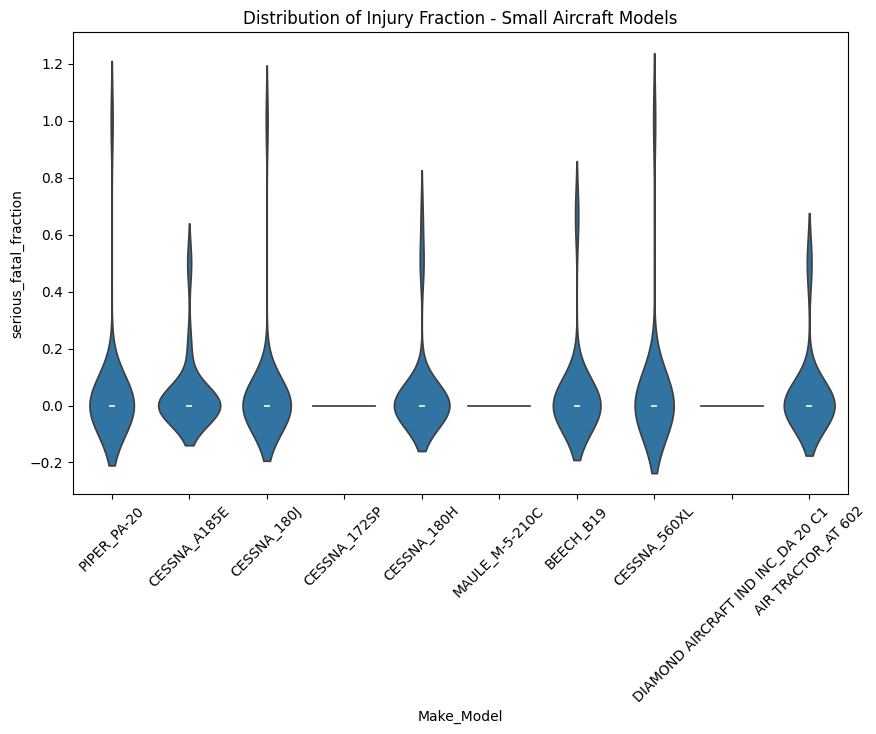

In [11]:
small_model_stats = (
  small_df
  .groupby("Make_Model")
  .agg(
    mean_injury_fraction=("serious_fatal_fraction", "mean"),
    count=("serious_fatal_fraction", "count")
  )
)

# Filter for robustness (>= 10 observations)
small_model_stats = small_model_stats[small_model_stats["count"] >= 10]

# Select lowest 10 models (as instructed)
small_lowest_models = small_model_stats.sort_values("mean_injury_fraction").head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=small_lowest_models.reset_index(),
    x="mean_injury_fraction",
    y="Make_Model"
)
plt.title("Small Aircraft Models - Lowest Mean Injury Fractions")
plt.xlabel("Mean Serious/Fatal Injury Fraction")
plt.ylabel("Aircraft Model")
plt.show()

# ---- DISTRIBUTION PLOT (Violinplot) ----
small_top10_models = small_lowest_models.index

plt.figure(figsize=(10,6))
sns.violinplot(
    data=small_df[small_df["Make_Model"].isin(small_top10_models)],
    x="Make_Model",
    y="serious_fatal_fraction"
)
plt.xticks(rotation=45)
plt.title("Distribution of Injury Fraction - Small Aircraft Models")
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Discussion of Specific Airplane Types

At the model level, several large commercial aircraft demonstrate exceptionally low mean serious/fatal injury fractions. In particular:

- Boeing 777 (0.0008, 33 observations)
- Boeing 757 (0.0015, 18 observations)
- Boeing 787 (0.0031, 11 observations)

These aircraft exhibit extremely low injury fractions while meeting the minimum observation threshold, suggesting strong survivability performance in recorded accident events. Boeing models dominate the lowest injury rankings, indicating comparatively consistent safety outcomes within this dataset.

Airbus models (A320, A330, A321) exhibit higher mean injury fractions relative to Boeing counterparts in this dataset, though sample sizes remain modest (10–24 observations). These differences should be interpreted cautiously, as accident-level averages do not reflect exposure rates or total flight hours.

For small aircraft, several models show zero recorded serious/fatal injury fractions across 11–12 accident observations (e.g., Maule M-5-210C, Diamond DA20 C1, Cessna 172SP). While promising, the relatively small sample sizes warrant cautious interpretation. 

Among models with larger sample sizes, Cessna 180 variants and Piper PA-20 demonstrate consistently low injury fractions (~0.03–0.05), suggesting comparatively favorable survivability characteristics within general aviation.

Overall, large commercial jet models—particularly Boeing 757, 777, and 787—exhibit the lowest serious/fatal injury fractions in the dataset. Small aircraft models display greater variability, though certain Cessna and Piper models perform strongly relative to peers.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

### Discussion of Additional Risk Factors

Weather Condition appears strongly associated with injury severity and aircraft destruction. Incidents occurring in IMC (instrument meteorological conditions) exhibit higher mean serious/fatal injury fractions and higher destruction rates compared to VMC conditions. This aligns with expectations, as reduced visibility, cloud cover, and adverse weather increase operational complexity and reduce pilot margin for error.

Engine Type also demonstrates meaningful variation in accident severity outcomes. Reciprocating engine aircraft show different injury and destruction patterns compared to turboprop and turbofan aircraft. Because reciprocating engines are predominantly used in smaller general aviation aircraft, these differences likely reflect aircraft class, structural design, operational context, and mission profile rather than engine mechanics alone. 

Turbofan and turboprop aircraft—typically used in larger commercial operations—tend to exhibit lower serious/fatal injury fractions and lower destruction rates relative to reciprocating aircraft. This is consistent with stricter regulatory environments, higher training standards, and more robust airframe design standards in commercial aviation.

Overall, both environmental conditions (weather) and aircraft characteristics (engine type) significantly influence accident severity outcomes. These findings reinforce that aircraft safety performance cannot be evaluated solely at the manufacturer or model level, as operational context and aircraft class meaningfully impact survivability outcomes.

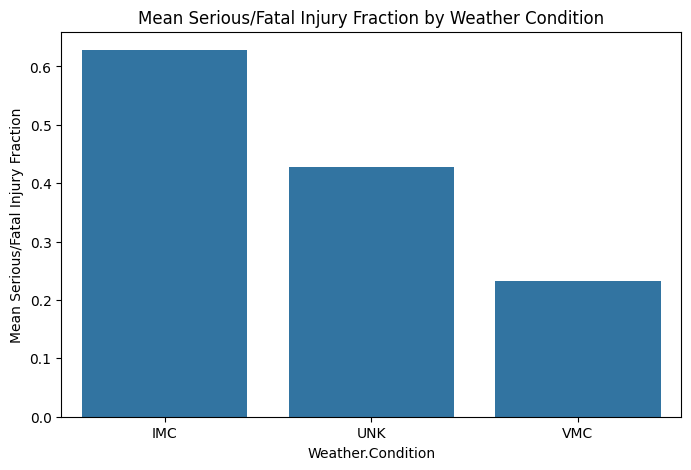

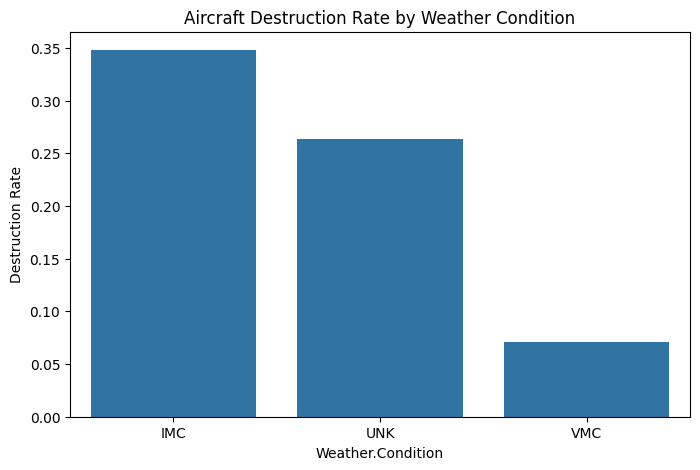

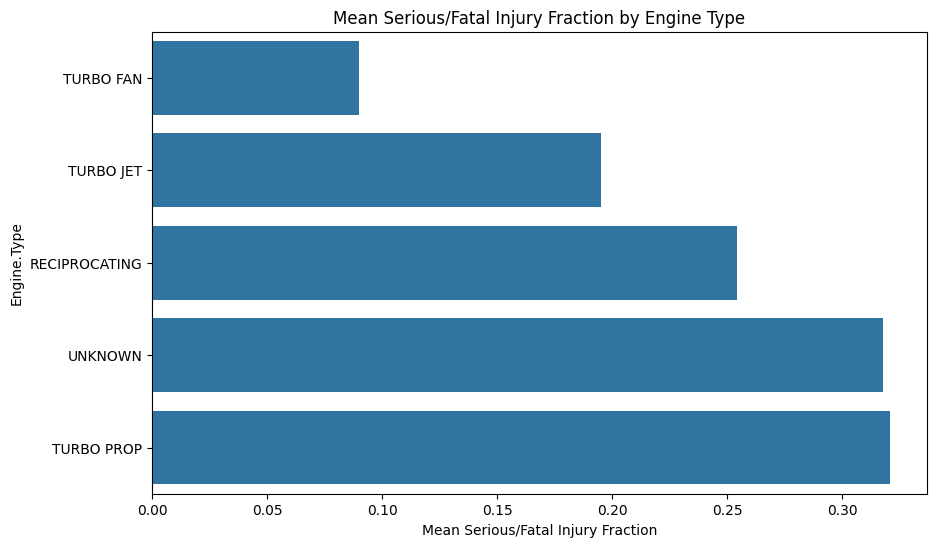

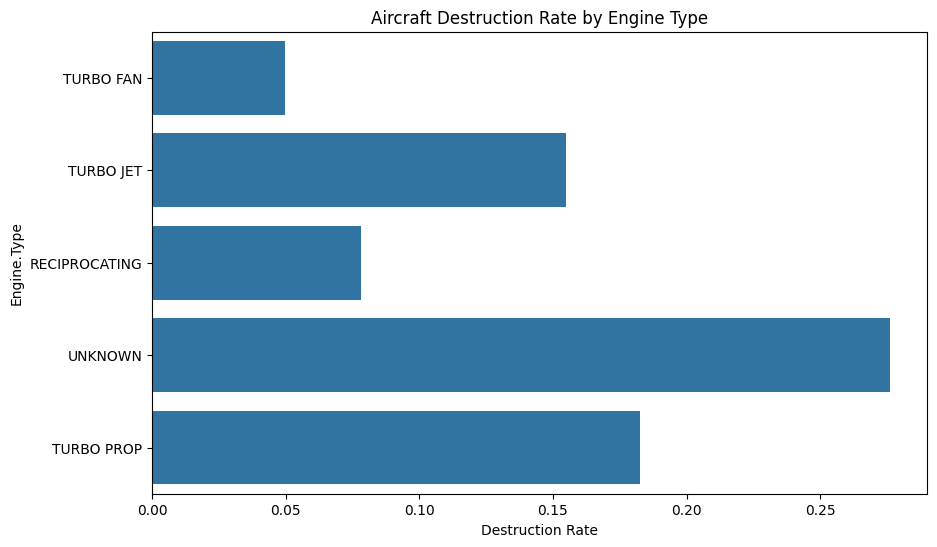

In [12]:
# weather
weather_stats = (
  df.groupby("Weather.Condition")
    .agg(
      mean_injury_fraction=("serious_fatal_fraction", "mean"),
      destroyed_rate=("destroyed", "mean"),
      count=("serious_fatal_fraction", "count")
    )
)

# keep meaningful groups
weather_stats = weather_stats[weather_stats["count"] >= 20]

weather_stats


plt.figure(figsize=(8,5))
sns.barplot(
  data=weather_stats.reset_index(),
  x="Weather.Condition",
  y="mean_injury_fraction"
)
plt.title("Mean Serious/Fatal Injury Fraction by Weather Condition")
plt.ylabel("Mean Serious/Fatal Injury Fraction")
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(
  data=weather_stats.reset_index(),
  x="Weather.Condition",
  y="destroyed_rate"
)
plt.title("Aircraft Destruction Rate by Weather Condition")
plt.ylabel("Destruction Rate")
plt.show()


# engine type
engine_stats = (
    df.groupby("Engine.Type")
      .agg(
          mean_injury_fraction=("serious_fatal_fraction", "mean"),
          destroyed_rate=("destroyed", "mean"),
          count=("serious_fatal_fraction", "count")
      )
)

engine_stats = engine_stats[engine_stats["count"] >= 20]

engine_stats = engine_stats.sort_values("mean_injury_fraction")

engine_stats


plt.figure(figsize=(10,6))
sns.barplot(
    data=engine_stats.reset_index(),
    x="mean_injury_fraction",
    y="Engine.Type"
)
plt.title("Mean Serious/Fatal Injury Fraction by Engine Type")
plt.xlabel("Mean Serious/Fatal Injury Fraction")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(
    data=engine_stats.reset_index(),
    x="destroyed_rate",
    y="Engine.Type"
)
plt.title("Aircraft Destruction Rate by Engine Type")
plt.xlabel("Destruction Rate")
plt.show()